# Analyse prix hébergement et tarifs dépendance des EHPAD - données brutes

Ces donnees sont issue de la base d'open data du gouvernement, accessible [ici](https://www.data.gouv.fr/fr/datasets/prix-hebergement-et-tarifs-dependance-des-ehpad-donnees-brutes/).

L'objectif ici est d'etudier la qualite des donnees transmises, et, en fonction de voir quelles types d'informations on pourrait en tirer.

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import outils_feature_engineering_810 as fe810
import seaborn as sns

In [2]:
data_path = "./data/cnsa-export-prix-ehpad-202308-brute.csv"

In [3]:
data = pd.read_csv(data_path, sep=";", encoding="ISO-8859-1")

L'encoding par defaut (utf-8) retournait une erreur.

In [4]:
print("Shape : ", data.shape)
data.head(2)

Shape :  (5904, 40)


,finessEt,prixHebPermCs,prixHebPermCd,prixHebPermCsa,prixHebPermCda,prixHebTempCs,prixHebTempCd,prixHebTempCsa,prixHebTempCda,PREST1,...,PRESTSUS8,PRESTSUS9,PRESTSUS9_1,PRESTSUS10,PRESTSUS11,AUTRES_PRIX_OU_PRESTATIONS,TARIF_GIR_12,TARIF_GIR_34,TARIF_GIR_56,DATE_MAJ
0,010002228,"110,3","98,8",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"21,2","13,46","5,71",2023-02-09 17:22:56.037
1,010004059,"72,06",NaN,"72,06",NaN,"86,5",NaN,"86,5",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"20,85","13,23","5,61",2023-01-11 14:33:54.440


In [5]:
data.dtypes

finessEt                       object
prixHebPermCs                  object
prixHebPermCd                  object
prixHebPermCsa                 object
prixHebPermCda                 object
prixHebTempCs                  object
prixHebTempCd                  object
prixHebTempCsa                 object
prixHebTempCda                 object
PREST1                        float64
PREST2                        float64
PREST3                        float64
PREST4                        float64
PREST5                        float64
PREST6                        float64
PREST7                        float64
PREST8                        float64
PREST9                        float64
PREST10                       float64
PREST11                       float64
AUTRE_PRESTATION_INCLUSE       object
PRESTSUS1                     float64
PRIX_LINGE                    float64
UNITE_PRIX_LINGE              float64
PRESTSUS2                     float64
PRESTSUS3                     float64
PRESTSUS4   

Les types annonces sur la plateforme data.gouv, [ici](https://www.data.gouv.fr/fr/datasets/prix-hebergement-et-tarifs-dependance-des-ehpad-donnees-brutes/) ne sont pas automatiquement repris.



## 1. Analyse des valeurs manquantes

<Axes: >

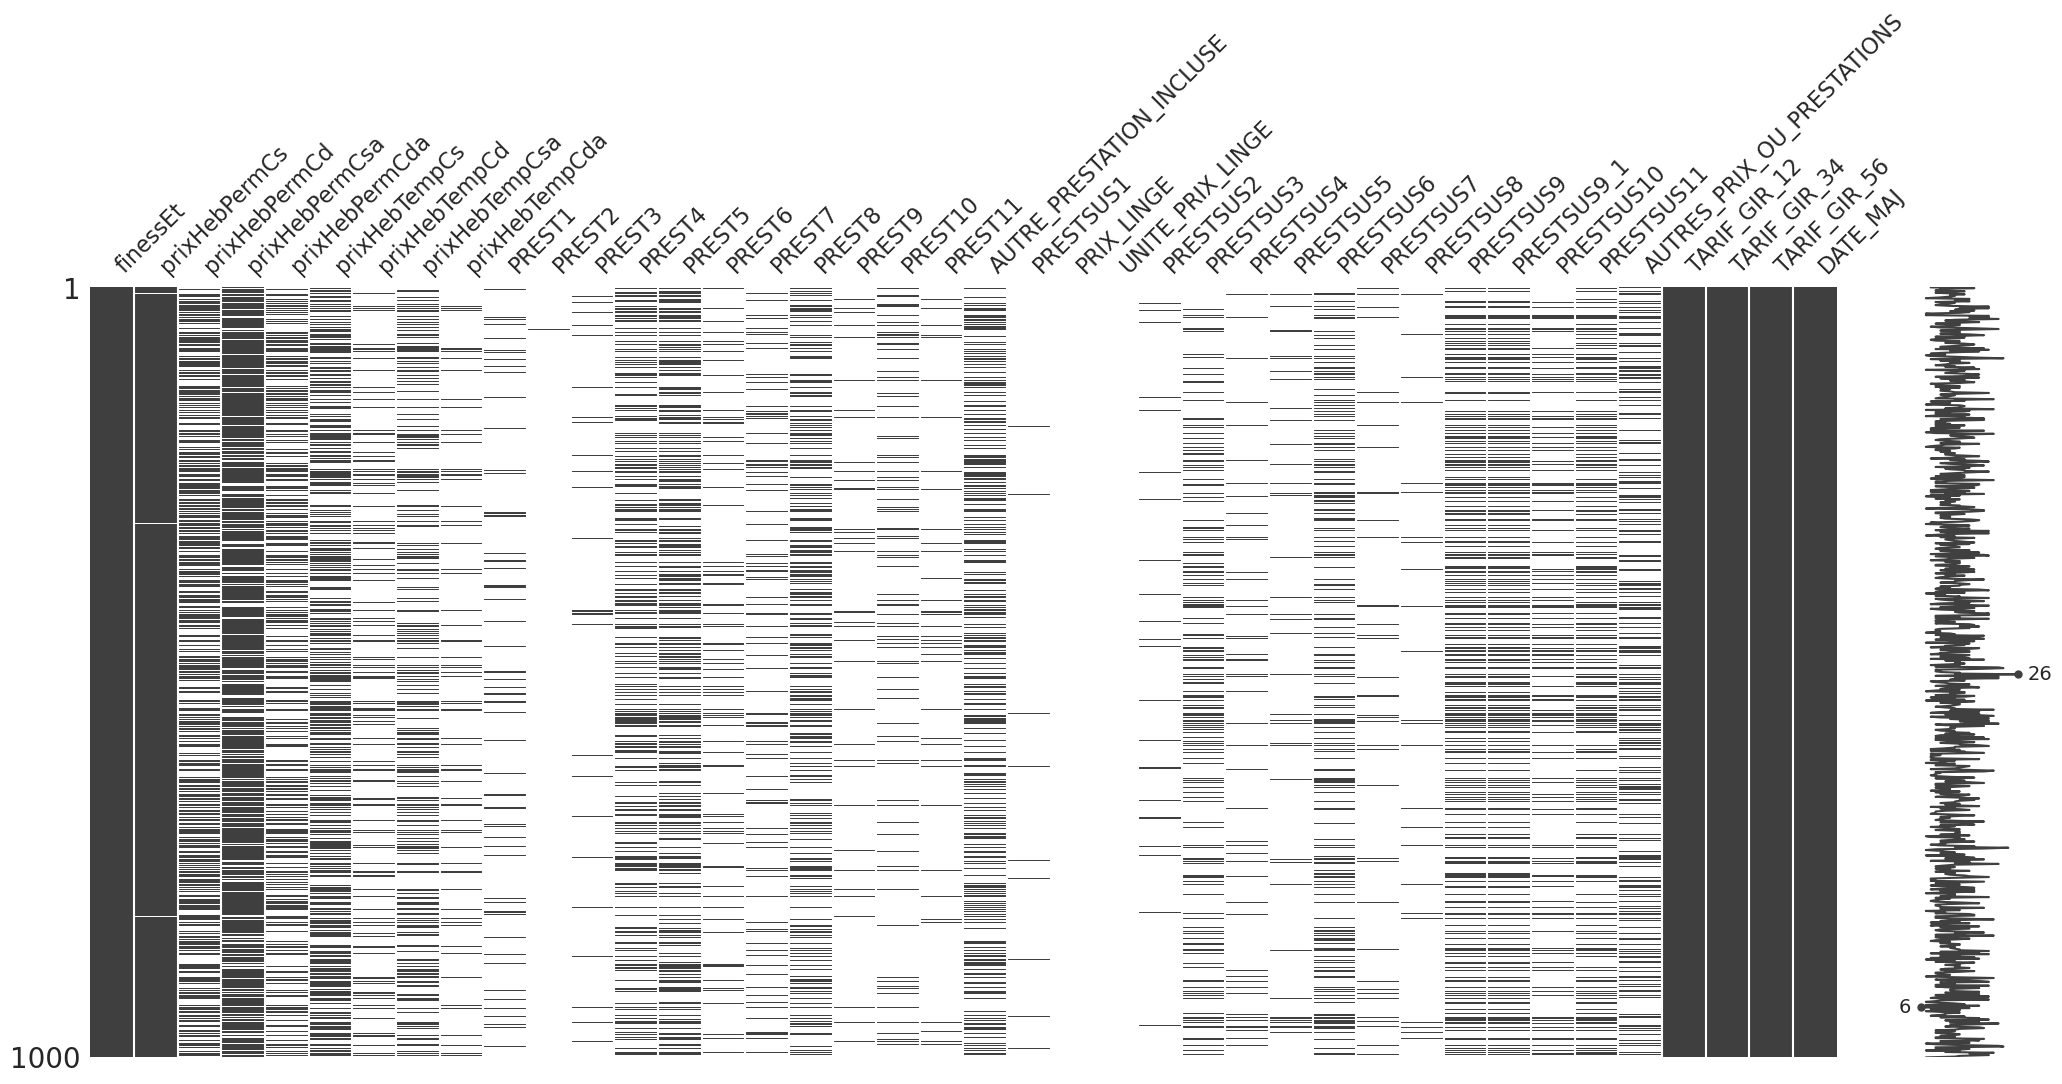

In [6]:
msno.matrix(data.sample(1000))

N.B : J'ai du modifie la librairie Missingno de l'environnement pour eviter des exceptions, cf. [ici](https://stackoverflow.com/questions/75525029/msno-matrix-shows-an-error-when-i-use-any-venv-using-pyenv)

On constate qu'il y a pas mal de variables qui ne sont pas ou peu renseignees : PREST2, PREST3, ..., PRESTSUS1, PRIX_LINGE, etc.


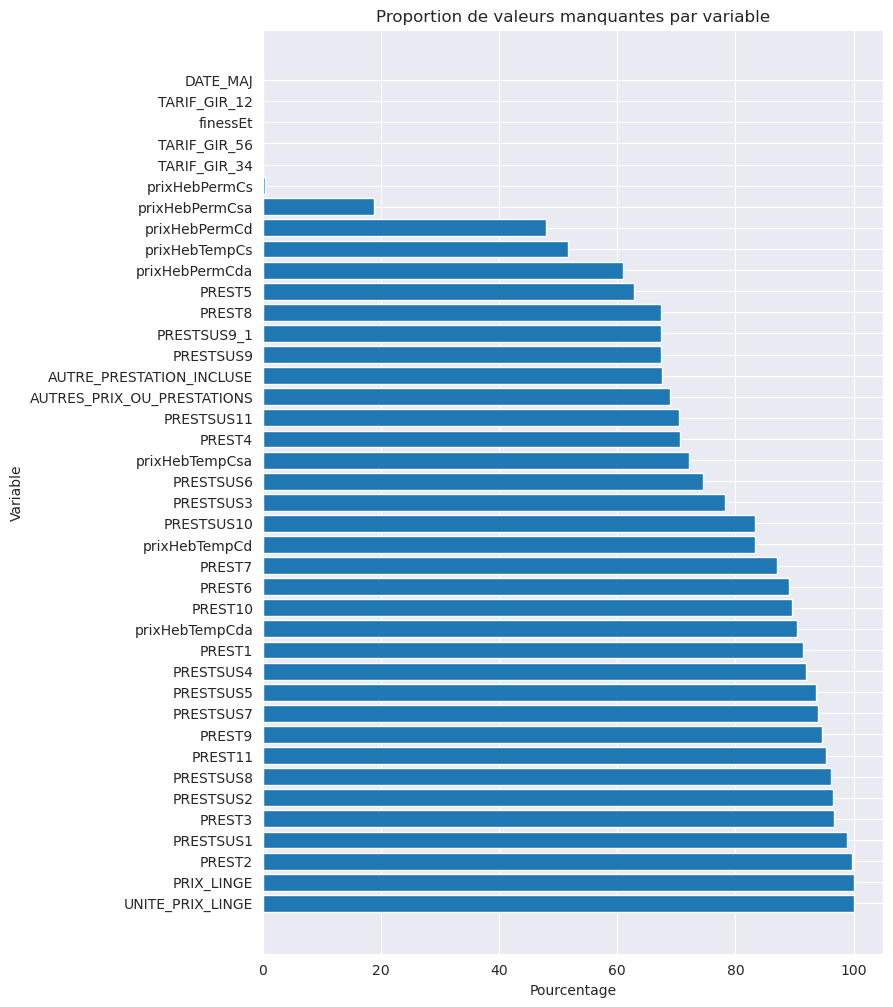

In [7]:
#Set the size of the figure
plt.figure(figsize=(8,12))
#Prepare the data
#Count and sort by the number of missing values.
counts_series = data.isnull().mean(axis=0).apply(lambda x: x*100).sort_values(ascending=False)
#Set the title and other labels if need be
plt.title("Proportion de valeurs manquantes par variable")
plt.ylabel("Variable")
plt.xlabel("Pourcentage")
#Plot the chart
plt.barh(counts_series.index,counts_series.values)
#Always show after plotting ⚡
plt.show()

In [8]:
mv_data_array = fe810.missing_values_table(data)
mv_data_array

,Missing Values,% of Total Values
UNITE_PRIX_LINGE,5904,100.0
PRIX_LINGE,5904,100.0
PREST2,5893,99.8
PRESTSUS1,5838,98.9
PREST3,5704,96.6
PRESTSUS2,5699,96.5
PRESTSUS8,5679,96.2
PREST11,5625,95.3
PREST9,5589,94.7
PRESTSUS7,5553,94.1


In [9]:
mv_data_array['% of Total Values'].mean()

77.69714285714288

En moyenne, 78% des valeurs sont manquantes sur l'ensemble du dataset.



In [10]:
cleaned_data = fe810.remove_too_nany_columns(df=data, treshold=0.3)
cleaned_data.head(2)

Forme avant traitement :  (5904, 40)
Suppression des 33 colonnes avec plus de 30.0% de valeurs manquantes
Dataset sans les features vides a plus de 30.0% :  (5904, 7)


,finessEt,prixHebPermCs,prixHebPermCsa,TARIF_GIR_12,TARIF_GIR_34,TARIF_GIR_56,DATE_MAJ
0,010002228,"110,3",NaN,"21,2","13,46","5,71",2023-02-09 17:22:56.037
1,010004059,"72,06","72,06","20,85","13,23","5,61",2023-01-11 14:33:54.440


In [11]:
fe810.missing_values_table(df=cleaned_data)

,Missing Values,% of Total Values
prixHebPermCsa,1112,18.8
prixHebPermCs,18,0.3


Si on ne conserve que les variables disposant de moins de 30% de valeurs manquante, il ne nous reste que 7 colonnes, dont deux presentent assez peu d'interet analytique :
- La date de mise a jour des donnees
- L'identifiant unique de l'EHPAD

On va tout de meme etudier plus en details les colonnes restantes.

## 2. Analyse des variables bien renseignees
### 2.0. Conversion des types

In [12]:
cleaned_data.dtypes

finessEt          object
prixHebPermCs     object
prixHebPermCsa    object
TARIF_GIR_12      object
TARIF_GIR_34      object
TARIF_GIR_56      object
DATE_MAJ          object
dtype: object

In [13]:
# ref_type definit les types tels que definis sur le site data.gouv
ref_types_officiel = {"finessEt" : "string",
             "prixHebPermCs" : "float",
             "prixHebPermCsa" : "date",
             "TARIF_GIR_12" : "date",
             "TARIF_GIR_34": "date",
             "TARIF_GIR_56":"float",
             "DATE_MAJ":"date"}

Je ne sais pas ce que sont prixHebPermCs et prixHebPermCsa, mais ils ne devraient pas avoir deux types differents, puisque les deux colonnes disposent generalement de donnees quantitative identiques ou tres proches. D'apres moi ce sont toutes deux des floats.

Et fait, quand on regarde les donnees, la seule variable qui semble vraiment de type date, c'est DATE_MAJ. Les autres semblent plutot etre des floats

In [14]:
# ref_type definit les types tels que definis sur le site data.gouv
ref_types_mbr = {"finessEt" : "string",
             "prixHebPermCs" : "float",
             "prixHebPermCsa" : "float",
             "TARIF_GIR_12" : "float",
             "TARIF_GIR_34": "float",
             "TARIF_GIR_56":"float",
             "DATE_MAJ":"date"}

Pour pouvoir convertir nos objets en float, il faut remplacer les ',' dans les nombres flottants, en '.'

In [15]:
cleaned_data.loc[:, 'prixHebPermCs'] = cleaned_data['prixHebPermCs'].str.replace(',', '.')
cleaned_data.loc[:, 'prixHebPermCsa'] = cleaned_data['prixHebPermCsa'].str.replace(',', '.')
cleaned_data.loc[:, 'TARIF_GIR_12'] = cleaned_data['TARIF_GIR_12'].str.replace(',', '.')
cleaned_data.loc[:, 'TARIF_GIR_34'] = cleaned_data['TARIF_GIR_34'].str.replace(',', '.')
cleaned_data.loc[:, 'TARIF_GIR_56'] = cleaned_data['TARIF_GIR_56'].str.replace(',', '.')

In [16]:
cleaned_data.head(2)

,finessEt,prixHebPermCs,prixHebPermCsa,TARIF_GIR_12,TARIF_GIR_34,TARIF_GIR_56,DATE_MAJ
0,010002228,110.3,NaN,21.2,13.46,5.71,2023-02-09 17:22:56.037
1,010004059,72.06,72.06,20.85,13.23,5.61,2023-01-11 14:33:54.440


In [17]:
def convertir_colonne(df_data, df_type) :
    res_df = pd.DataFrame()
    for col in df_data.columns :
        if df_type[col] == "float" :
            res_df.loc[:, col] = df_data[col].astype(float)
        elif df_type[col] == "date" :
            res_df.loc[:, col] = df_data[col].astype('datetime64[ns]')
        else :
            res_df.loc[:, col] = df_data[col]
    return res_df

In [18]:
typed_df = convertir_colonne(df_data=cleaned_data, df_type=ref_types_mbr)

In [19]:
typed_df.dtypes

finessEt                  object
prixHebPermCs            float64
prixHebPermCsa           float64
TARIF_GIR_12             float64
TARIF_GIR_34             float64
TARIF_GIR_56             float64
DATE_MAJ          datetime64[ns]
dtype: object

### 2.1. Analyse des distributions

/home/maximorose/anaconda3/envs/cnsa_od_ehpad/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


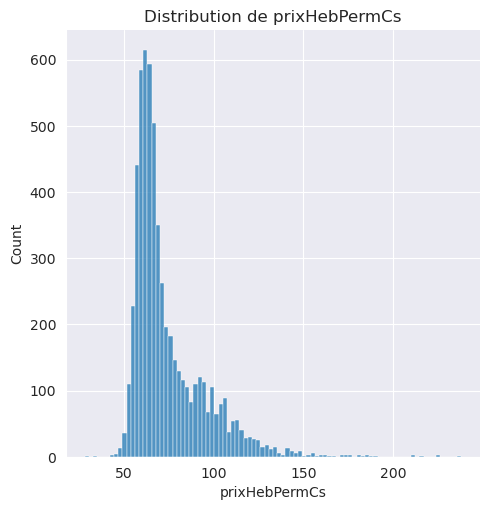

In [20]:
feature_name = "prixHebPermCs"
sns.displot(data=typed_df, x=feature_name)
plt.title(f"Distribution de {feature_name}")
plt.show()

/home/maximorose/anaconda3/envs/cnsa_od_ehpad/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


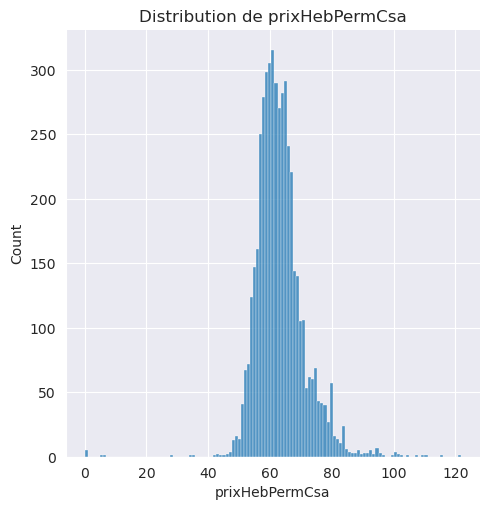

In [21]:
feature_name = "prixHebPermCsa"
sns.displot(data=typed_df, x=feature_name)
plt.title(f"Distribution de {feature_name}")
plt.show()

/home/maximorose/anaconda3/envs/cnsa_od_ehpad/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


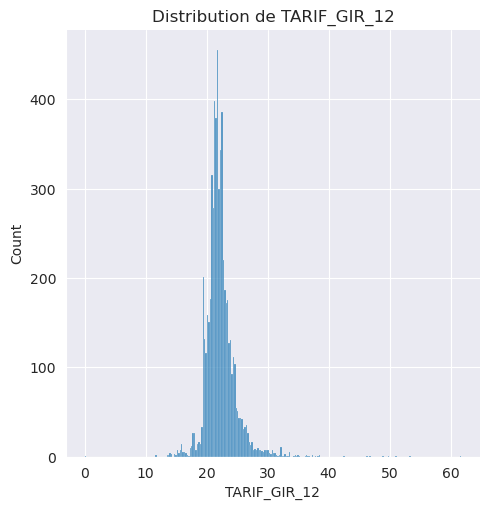

In [22]:
feature_name = "TARIF_GIR_12"
sns.displot(data=typed_df, x=feature_name)
plt.title(f"Distribution de {feature_name}")
plt.show()

/home/maximorose/anaconda3/envs/cnsa_od_ehpad/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


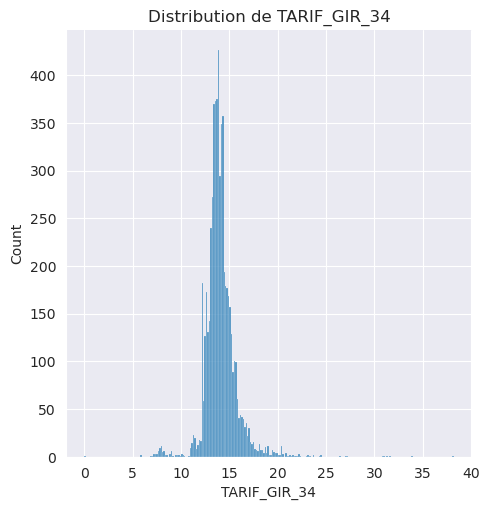

In [23]:
feature_name = "TARIF_GIR_34"
sns.displot(data=typed_df, x=feature_name)
plt.title(f"Distribution de {feature_name}")
plt.show()

/home/maximorose/anaconda3/envs/cnsa_od_ehpad/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


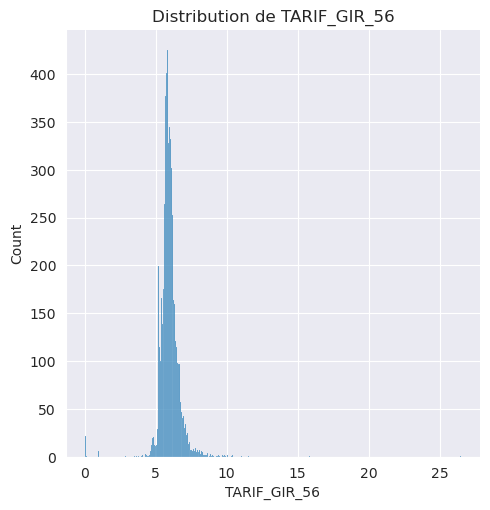

In [24]:
feature_name = "TARIF_GIR_56"
sns.displot(data=typed_df, x=feature_name)
plt.title(f"Distribution de {feature_name}")
plt.show()

# Perspectives d'amelioration continue

1. Actuellement, il manque beaucoup d'informations pour pouvoir utiliser les donnees censees etre a disposition
2. Il pourrait etre interessant d'accompagner le tableau d'une description litterale des colonnes, pour qu'il soit plus facile a comprendre
3. Les formats annonces sur le site data.gouv sont a revoir
4. Il serait preferable d'utiliser des "." plutot que des virgules pour les valeurs des nombres flottants.